In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

In [ ]:
# Step 2: Load your final dataset
df = pd.read_csv('/content/CanIpark.csv')  # Replace with your correct file name

print("✅ Data loaded successfully!")

✅ Data loaded successfully!


In [ ]:
# Step 3: Check Missing Values
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
Slot Number                0
Date                       0
Timing                     0
Day                        0
Street Name                0
Zone ID                    0
Latitude                   0
Longitude                  0
Slot Length                0
Paid/Free                  0
Filled/Empty               0
pf_color                   0
ef_color                   0
Status                     0
Paid End Time              0
Street Cleaning Days       0
Street Cleaning Timings    0
Negative                   0
Neutral                    0
Positive                   0
Rating                     0
dtype: int64


In [ ]:
df.describe()

,Slot Number,Latitude,Longitude,Slot Length,Negative,Neutral,Positive,Rating
count,177600.000000,177600.000000,177600.000000,177600.0,177600.000000,177600.000000,177600.000000,177600.00000
mean,555.500000,40.743772,-74.140565,10.0,15.108108,12.378378,90.009009,3.45045
std,320.430171,0.000513,0.009613,0.0,8.745012,6.254463,32.055081,0.82461
min,1.000000,40.742100,-74.157200,10.0,2.000000,4.000000,37.000000,2.00000
25%,278.000000,40.743450,-74.148890,10.0,14.000000,11.000000,85.000000,3.00000
50%,555.500000,40.743870,-74.140565,10.0,15.000000,11.000000,86.000000,3.00000
75%,833.000000,40.744170,-74.132240,10.0,15.000000,14.000000,105.000000,4.00000
max,1110.000000,40.744500,-74.123930,10.0,42.000000,31.000000,163.000000,5.00000


**Data Type Correction**

In [ ]:
# Step 1: Fix Timing Column
def convert_time_to_hour(x):
    if pd.isna(x):
        return np.nan
    try:
        return pd.to_datetime(x, format='%I:%M %p').hour
    except:
        return np.nan

# Apply function
df['Timing'] = df['Timing'].apply(convert_time_to_hour)

# Fill missing values safely (no inplace warning)
df['Timing'] = df['Timing'].fillna(8)

# Force correct types
df['Slot Number'] = df['Slot Number'].astype(int)
df['Timing'] = df['Timing'].astype(int)
df['Paid/Free'] = df['Paid/Free'].apply(lambda x: 1 if str(x).lower() == 'f' else 0)
df['Filled/Empty'] = df['Filled/Empty'].apply(lambda x: 1 if str(x).lower() == 'e' else 0)


In [ ]:


# Convert Day and Street Name to Category
df['Day'] = df['Day'].astype('category')
df['Street Name'] = df['Street Name'].astype('category')
df['Zone ID'] = df['Zone ID'].astype('category')

In [ ]:
# Step 7: Quick Info Check
print("\n✅ Final Data Info After Cleaning and Type Correction:")
print(df.info())


✅ Final Data Info After Cleaning and Type Correction:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177600 entries, 0 to 177599
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Slot Number              177600 non-null  int64   
 1   Date                     177600 non-null  object  
 2   Timing                   177600 non-null  int64   
 3   Day                      177600 non-null  category
 4   Street Name              177600 non-null  category
 5   Zone ID                  177600 non-null  category
 6   Latitude                 177600 non-null  float64 
 7   Longitude                177600 non-null  float64 
 8   Slot Length              177600 non-null  int64   
 9   Paid/Free                177600 non-null  int64   
 10  Filled/Empty             177600 non-null  int64   
 11  pf_color                 177600 non-null  object  
 12  ef_color                 177600 non-null  obj

In [ ]:

# Step 8: Save intermediate cleaned file (optional)
df.to_csv('phase1_cleaned_dataset.csv', index=False)
print("\n✅ Phase 1 dataset saved as 'phase1_cleaned_dataset.csv'")



✅ Phase 1 dataset saved as 'phase1_cleaned_dataset.csv'


In [ ]:

from google.colab import files
files.download('phase1_cleaned_dataset.csv')










<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Step 2: Load the cleaned dataset
df2 = pd.read_csv('/content/phase1_cleaned_dataset.csv')

In [ ]:
# Step 3: Encode Paid/Free
# (Already converted to 0/1 in Phase 1, but double-check)
print("\nUnique values in Paid/Free before encoding:", df2['Paid/Free'].unique())



Unique values in Paid/Free before encoding: [1 0]


In [ ]:
# No change needed if already 0/1, otherwise do:
df2['Paid/Free'] = df2['Paid/Free'].apply(lambda x: 1 if str(x).lower() == 'f' else 0)  # Safety check


In [ ]:
# Example: Create columns like day_Mon, day_Tue, etc.
day_dummies = pd.get_dummies(df2['Day'], prefix='day')

In [ ]:
# Merge back into original dataframe
df2 = pd.concat([df2.drop('Day', axis=1), day_dummies], axis=1)

In [ ]:
# Assign a number to each street
street_mapping = {street: idx for idx, street in enumerate(df2['Street Name'].unique())}
df2['Street Name'] = df2['Street Name'].map(street_mapping)

print("✅ Street names label encoded successfully!")

✅ Street names label encoded successfully!


In [ ]:
# Expand 'Street Cleaning Days' column into multiple columns
def create_cleaning_columns(df2):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
    for day in days:
        df2[f'cleaning_{day.lower()}'] = df2['Street Cleaning Days'].apply(lambda x: 1 if day in str(x) else 0)
    return df2

df2 = create_cleaning_columns(df2)

In [ ]:

# Drop the original combined cleaning days column
df2.drop('Street Cleaning Days', axis=1, inplace=True)

print("✅ Cleaning days expanded into separate columns successfully!")

✅ Cleaning days expanded into separate columns successfully!


Target_fe = 1 means the parking slot is Empty (available to park).

Target_fe = 0 means the parking slot is Filled (not available).

In [ ]:
# Step 4: Rename Filled/Empty → Available
df2.rename(columns={'Filled/Empty': 'Target_fe'}, inplace=True)

In [ ]:
def split_cleaning_times(time_range):
    if pd.isna(time_range):
        return pd.Series([np.nan, np.nan])
    try:
        start, end = time_range.split('-')
        start_hour = pd.to_datetime(start.strip(), format='%I%p').hour
        end_hour = pd.to_datetime(end.strip(), format='%I%p').hour
        return pd.Series([start_hour, end_hour])
    except:
        return pd.Series([np.nan, np.nan])

df2[['cleaning_start_hour', 'cleaning_end_hour']] = df2['Street Cleaning Timings'].apply(split_cleaning_times)
df2.drop('Street Cleaning Timings', axis=1, inplace=True)


In [ ]:
# Step 8: Final Dataset Check
print("\n✅ Final columns after Phase 2 encoding:")
print(df2.columns)
print(df2.head())


✅ Final columns after Phase 2 encoding:
Index(['Slot Number', 'Date', 'Timing', 'Street Name', 'Zone ID', 'Latitude',
       'Longitude', 'Slot Length', 'Paid/Free', 'Target_fe', 'pf_color',
       'ef_color', 'Status', 'Paid End Time', 'Negative', 'Neutral',
       'Positive', 'Rating', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'cleaning_mon', 'cleaning_tue', 'cleaning_wed', 'cleaning_thu',
       'cleaning_fri', 'cleaning_start_hour', 'cleaning_end_hour'],
      dtype='object')
   Slot Number        Date  Timing  Street Name Zone ID  Latitude  Longitude  \
0            1  01-04-2025       8            0     Z01   40.7445   -74.1572   
1            1  01-04-2025       9            0     Z01   40.7445   -74.1572   
2            1  01-04-2025      10            0     Z01   40.7445   -74.1572   
3            1  01-04-2025      11            0     Z01   40.7445   -74.1572   
4            1  01-04-2025      12  

In [ ]:
# Step 9: Save Phase 2 Dataset
df2.to_csv('phase2_dataset.csv', index=False)
print("\n✅ Phase 2 dataset saved as 'phase2_dataset.csv'")


✅ Phase 2 dataset saved as 'phase2_dataset.csv'


In [ ]:
from google.colab import files
files.download('phase2_dataset.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Part 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
# Load your Phase 2 dataset into df3
df3 = pd.read_csv('//content/phase2_clearset.csv')

print("✅ Phase 2 dataset loaded into df3 successfully!")

✅ Phase 2 dataset loaded into df3 successfully!


In [ ]:
# Part 2: Basic Info
print("\n✅ Basic Information about df3:")
print(df3.info())
print("\nDataset Shape:", df3.shape)



✅ Basic Information about df3:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177600 entries, 0 to 177599
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Slot Number          177600 non-null  int64  
 1   Date                 177600 non-null  object 
 2   Timing               177600 non-null  int64  
 3   Street Name          177600 non-null  object 
 4   Zone ID              177600 non-null  object 
 5   Latitude             177600 non-null  float64
 6   Longitude            177600 non-null  float64
 7   Slot Length          177600 non-null  int64  
 8   Paid/Free            177600 non-null  int64  
 9   Target_fe            177600 non-null  int64  
 10  pf_color             177600 non-null  object 
 11  ef_color             177600 non-null  object 
 12  Status               177600 non-null  object 
 13  Paid End Time        177600 non-null  object 
 14  Negative             177600 non-null

In [ ]:
# Part 3: Checking Missing Values
print("\n✅ Checking for Missing Values in df3:")
print(df3.isnull().sum())



✅ Checking for Missing Values in df3:
Slot Number            0
Date                   0
Timing                 0
Street Name            0
Zone ID                0
Latitude               0
Longitude              0
Slot Length            0
Paid/Free              0
Target_fe              0
pf_color               0
ef_color               0
Status                 0
Paid End Time          0
Negative               0
Neutral                0
Positive               0
Rating                 0
day_Friday             0
day_Monday             0
day_Saturday           0
day_Sunday             0
day_Thursday           0
day_Tuesday            0
day_Wednesday          0
cleaning_mon           0
cleaning_tue           0
cleaning_wed           0
cleaning_thu           0
cleaning_fri           0
cleaning_start_hour    0
cleaning_end_hour      0
dtype: int64


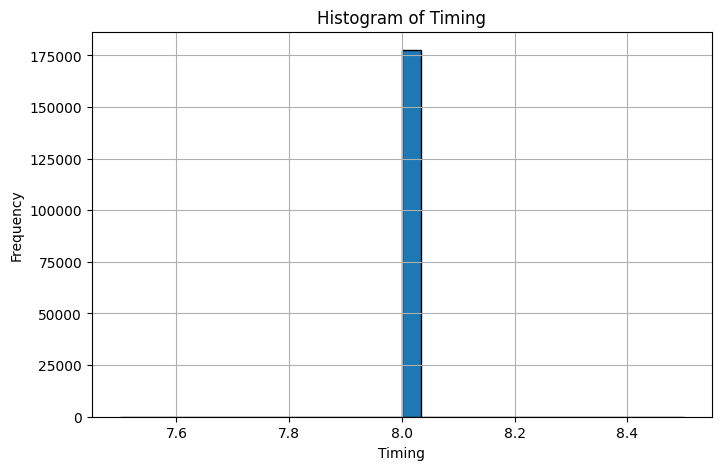

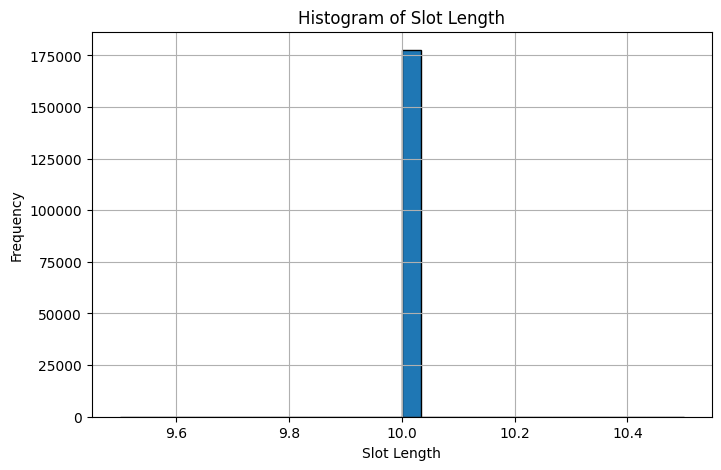

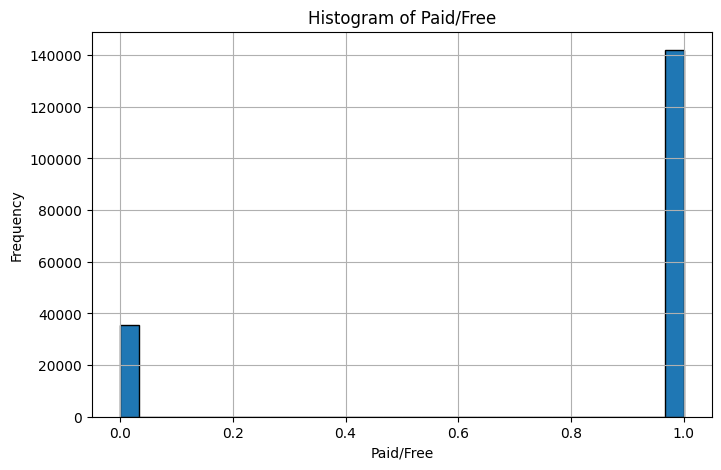

In [ ]:
# Part 4: Histograms of Important Columns
numeric_columns = ['Timing', 'Slot Length', 'Paid/Free', 'Available', 'rating']

for col in numeric_columns:
    if col in df3.columns:
        plt.figure(figsize=(8, 5))
        plt.hist(df3[col], bins=30, edgecolor='black')
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()



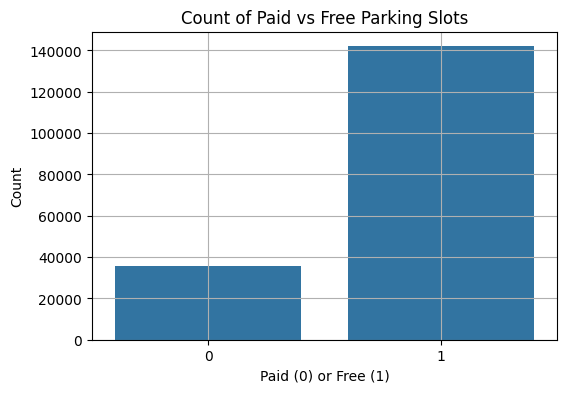

In [ ]:
# Part 5: Barplots

# Paid/Free
if 'Paid/Free' in df3.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df3, x='Paid/Free')
    plt.title('Count of Paid vs Free Parking Slots')
    plt.xlabel('Paid (0) or Free (1)')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()





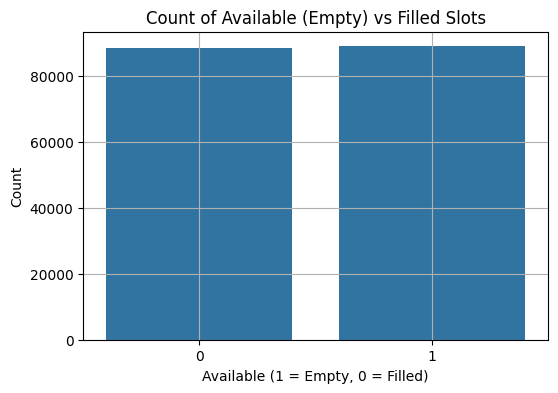

In [ ]:
# Available
if 'Target_fe' in df3.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df3, x='Target_fe')
    plt.title('Count of Available (Empty) vs Filled Slots')
    plt.xlabel('Available (1 = Empty, 0 = Filled)')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
important_cols = ['Timing', 'Slot Length', 'Latitude', 'Longitude',
                  'cleaning_start_hour', 'cleaning_end_hour', 'rating']


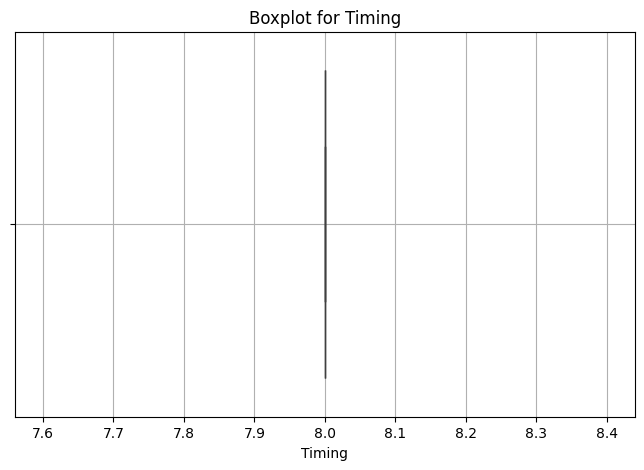

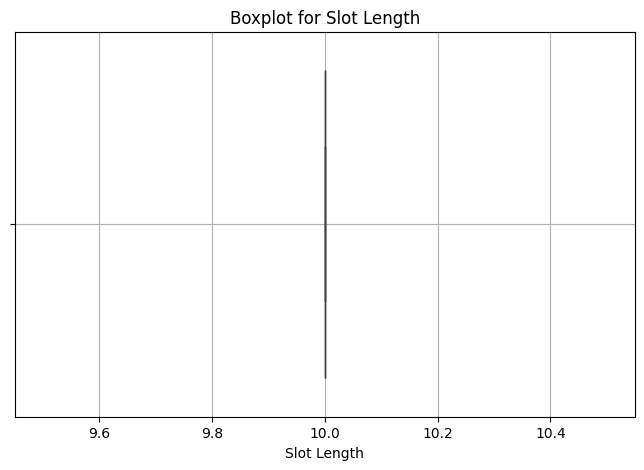

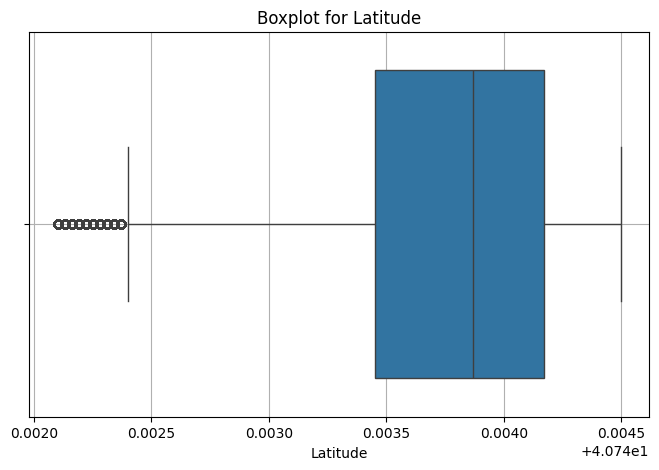

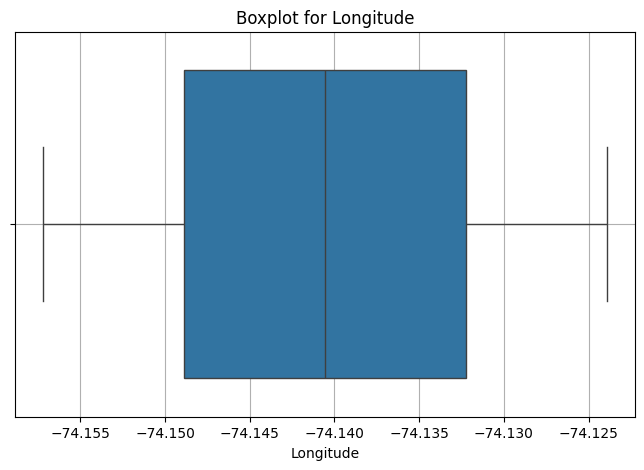

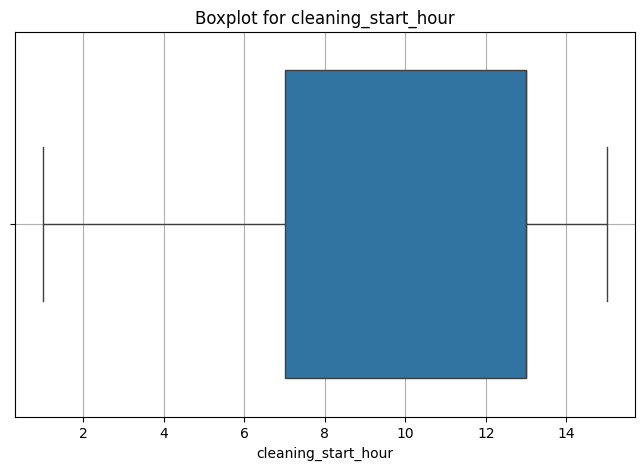

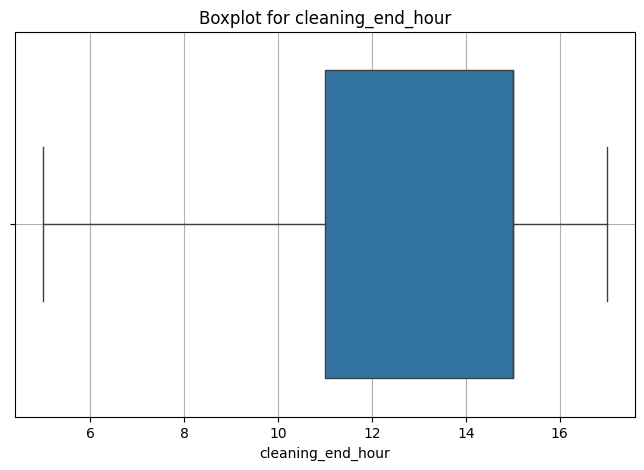

In [ ]:
# Boxplots to see distribution and detect visual outliers
for col in important_cols:
    if col in df3.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df3[col])
        plt.title(f"Boxplot for {col}")
        plt.grid(True)
        plt.show()


In [ ]:
# Function to detect outliers using IQR Method
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Detect outliers for each important column
for col in important_cols:
    if col in df3.columns:
        outliers = detect_outliers_iqr(df3, col)
        print(f"\n✅ {col}: {len(outliers)} outliers detected")



✅ Timing: 0 outliers detected

✅ Slot Length: 0 outliers detected

✅ Latitude: 3040 outliers detected

✅ Longitude: 0 outliers detected

✅ cleaning_start_hour: 0 outliers detected

✅ cleaning_end_hour: 0 outliers detected


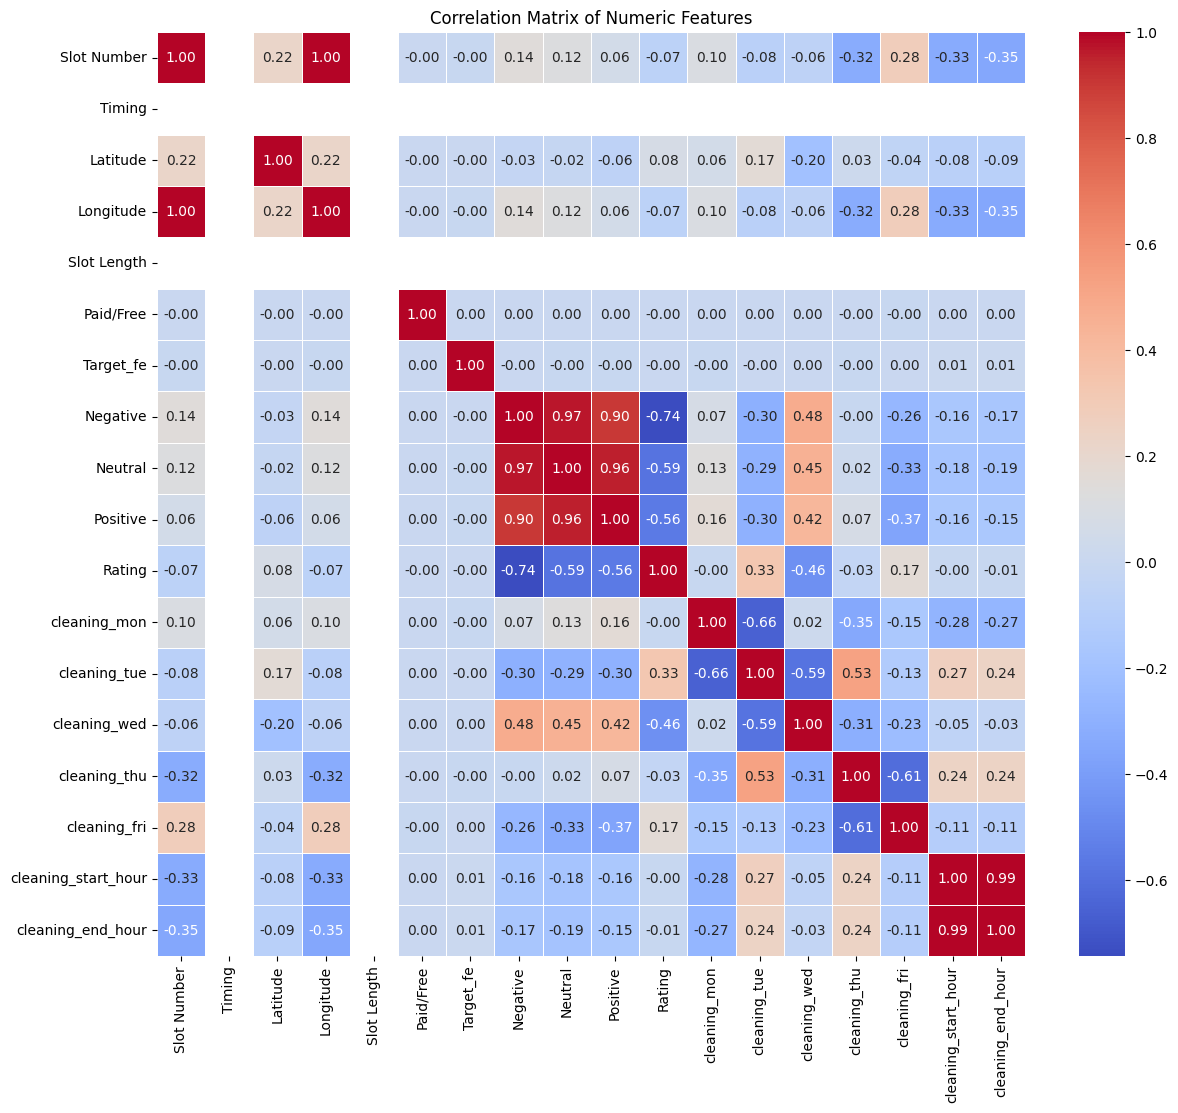


✅ Correlation Heatmap Plotted Successfully!


In [ ]:
# Step 1: Select only Numeric Features (Skip text or one-hot columns for now)
numeric_features = df3.select_dtypes(include=[np.number])

# Step 2: Calculate Correlation Matrix
correlation_matrix = numeric_features.corr()

# Step 3: Plot the Correlation Heatmap
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

print("\n✅ Correlation Heatmap Plotted Successfully!")


#Feature enginerring

**Creating Peak Hour Feature**

In [ ]:
# Step 1: Define a function to label Peak Hours
def is_peak_hour(hour):
    if (7 <= hour <= 10) or (17 <= hour <= 20):  # Morning 7-10 AM and Evening 5-8 PM
        return 1  # Peak Hour
    else:
        return 0  # Non-Peak Hour

# Step 2: Apply the function to your Timing column
df3['peak_hour'] = df3['Timing'].apply(is_peak_hour)

# Step 3: Quick Check
print(df3[['Timing', 'peak_hour']].head(15))


    Timing  peak_hour
0        8          1
1        8          1
2        8          1
3        8          1
4        8          1
5        8          1
6        8          1
7        8          1
8        8          1
9        8          1
10       8          1
11       8          1
12       8          1
13       8          1
14       8          1


**Creating Weekend Feature**

In [ ]:
# Step 1: Convert boolean True/False to integer 1/0
df3['day_Saturday'] = df3['day_Saturday'].astype(int)
df3['day_Sunday'] = df3['day_Sunday'].astype(int)

# Step 2: Now safely create 'weekend' feature
df3['weekend'] = df3[['day_Saturday', 'day_Sunday']].sum(axis=1)
df3['weekend'] = df3['weekend'].apply(lambda x: 1 if x >= 1 else 0)

# Step 3: Quick Check
print(df3[['day_Saturday', 'day_Sunday', 'weekend']].head(15))


    day_Saturday  day_Sunday  weekend
0              0           0        0
1              0           0        0
2              0           0        0
3              0           0        0
4              0           0        0
5              0           0        0
6              0           0        0
7              0           0        0
8              0           0        0
9              0           0        0
10             0           0        0
11             0           0        0
12             0           0        0
13             0           0        0
14             0           0        0


**Creating RATING Feature for streets**

In [ ]:
# Step 1: Group by Street Name and count number of slots
street_counts = df3['Street Name'].value_counts()

# Step 2: Create a mapping based on street_counts
def assign_popularity(street):
    count = street_counts.get(street, 0)
    if count >= 500:  # You can adjust these thresholds based on your data
        return 2  # Highly Popular
    elif count >= 200:
        return 1  # Moderately Popular
    else:
        return 0  # Less Popular

# Step 3: Apply mapping to create new 'street_popularity' feature
df3['street_popularity'] = df3['Street Name'].apply(assign_popularity)

# Step 4: Quick Check
print(df3[['Street Name', 'street_popularity']].head(20))


      Street Name  street_popularity
0   Hiram PI Left                  2
1   Hiram PI Left                  2
2   Hiram PI Left                  2
3   Hiram PI Left                  2
4   Hiram PI Left                  2
5   Hiram PI Left                  2
6   Hiram PI Left                  2
7   Hiram PI Left                  2
8   Hiram PI Left                  2
9   Hiram PI Left                  2
10  Hiram PI Left                  2
11  Hiram PI Left                  2
12  Hiram PI Left                  2
13  Hiram PI Left                  2
14  Hiram PI Left                  2
15  Hiram PI Left                  2
16  Hiram PI Left                  2
17  Hiram PI Left                  2
18  Hiram PI Left                  2
19  Hiram PI Left                  2


**Creating Cleaning Risk Feature**

In [ ]:
# Step 1: Define a function to check cleaning risk
def check_cleaning_risk(row):
    if (
        (row['day_Monday'] == 1 and row['cleaning_mon'] == 1) or
        (row['day_Tuesday'] == 1 and row['cleaning_tue'] == 1) or
        (row['day_Wednesday'] == 1 and row['cleaning_wed'] == 1) or
        (row['day_Thursday'] == 1 and row['cleaning_thu'] == 1) or
        (row['day_Friday'] == 1 and row['cleaning_fri'] == 1)
    ):
        return 1  # Cleaning happening today
    else:
        return 0  # No cleaning today

# Step 2: Apply function row-wise
df3['cleaning_risk'] = df3.apply(check_cleaning_risk, axis=1)

# Step 3: Quick Check
print(df3[['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Friday',
           'cleaning_mon', 'cleaning_tue', 'cleaning_wed', 'cleaning_thu', 'cleaning_fri',
           'cleaning_risk']].head(15))


    day_Monday  day_Tuesday  day_Wednesday  day_Thursday  day_Friday  \
0        False         True          False         False       False   
1        False         True          False         False       False   
2        False         True          False         False       False   
3        False         True          False         False       False   
4        False         True          False         False       False   
5        False         True          False         False       False   
6        False         True          False         False       False   
7        False         True          False         False       False   
8        False         True          False         False       False   
9        False         True          False         False       False   
10       False         True          False         False       False   
11       False         True          False         False       False   
12       False         True          False         False       F

** creating Safety Category Feature**

In [ ]:
# Step 1: Define your custom function for Safety Category
def custom_classify_safety(rating):
    if rating == 5:
        return 5  # High Safety
    elif rating == 4:
        return 4  # Good Safety
    elif rating == 3:
        return 3  # Low Safety
    elif rating <= 2:
        return 1  # Risky Area
    else:
        return 0  # Unknown / Bad Data (Optional case)

# Step 2: Apply your function to 'Rating' column
df3['safety_category'] = df3['Rating'].apply(custom_classify_safety)

# Step 3: Quick Check
print(df3[['Rating', 'safety_category']].head(15))


    Rating  safety_category
0        5                5
1        5                5
2        5                5
3        5                5
4        5                5
5        5                5
6        5                5
7        5                5
8        5                5
9        5                5
10       5                5
11       5                5
12       5                5
13       5                5
14       5                5


In [ ]:
# Step 1: Save the full df3 (which has original + new features)
df3.to_csv('phase4_final_full_dataset.csv', index=False)

print("✅ Full dataset with all original + new features saved as 'phase4_final_full_dataset.csv'!")
print("✅ Total Columns Now:", df3.columns.tolist())
print(df3.head(10))  # Quick preview


✅ Full dataset with all original + new features saved as 'phase4_final_full_dataset.csv'!
✅ Total Columns Now: ['Slot Number', 'Date', 'Timing', 'Street Name', 'Zone ID', 'Latitude', 'Longitude', 'Slot Length', 'Paid/Free', 'Target_fe', 'pf_color', 'ef_color', 'Status', 'Paid End Time', 'Negative', 'Neutral', 'Positive', 'Rating', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'cleaning_mon', 'cleaning_tue', 'cleaning_wed', 'cleaning_thu', 'cleaning_fri', 'cleaning_start_hour', 'cleaning_end_hour', 'peak_hour', 'weekend', 'street_popularity', 'cleaning_risk', 'safety_category']
   Slot Number        Date  Timing    Street Name Zone ID  Latitude  \
0            1  01-04-2025       8  Hiram PI Left     Z01   40.7445   
1            1  01-04-2025       8  Hiram PI Left     Z01   40.7445   
2            1  01-04-2025       8  Hiram PI Left     Z01   40.7445   
3            1  01-04-2025       8  Hiram PI Left     Z01   40.7445   
4

In [ ]:
# Step 2: Download the file (Colab Method)
from google.colab import files
files.download('phase4_final_full_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Choosing the Model**



**Random Forest Classifier**	Works very well on structured data (like tables)

**Logistic Regression**	Good for simple binary prediction (Available/Not Available)

**Decision Tree Classifier**	Easy to visualize and explain to customers

**XGBoost Classifier**	(optional, advanced) — Very powerful but needs tuning

 For now, I'm choosing Random Forest Classifier first because:

It is strong

Handles noisy data

Works well without much feature scaling

Best for beginner-to-professional level

In [ ]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:

df4= pd.read_csv('/content/phase4_final_full_dataset.csv')

# Step 2: Encode Status into a new categorical column
status_mapping = {
    'Free_Empty': 0,
    'Free_Filled': 1,
    'Paid_Empty': 2,
    'Paid_Filled': 3
}
df4['status_encoded'] = df4['Status'].map(status_mapping)

In [ ]:
# Step 3: Define the final feature columns
feature_columns = [
    'Slot Number',       # Slot number
    'Timing',            # Hour of the day
    'Latitude',          # (Optional for location use)
    'Longitude',         # (Optional for location use)
    'Paid/Free',         # Paid or Free slot
    'peak_hour',         # Peak hour effect
    'weekend',           # Weekend effect
    'street_popularity', # Popular street crowd effect
    'cleaning_risk',     # Street cleaning days effect
    'safety_category',   # Safety effect
    'status_encoded'     # ✅ New smart feature based on Free/Paid and Filled/Empty
]

In [ ]:
# Step 4: Separate Features and Target
X = df4[feature_columns]
y = df4['Target_fe']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Step 6: Quick Check
print("✅ Feature Variables Selected: ", feature_columns)
print(f"✅ Training Set Size: {X_train.shape}")
print(f"✅ Testing Set Size: {X_test.shape}")


✅ Feature Variables Selected:  ['Slot Number', 'Timing', 'Latitude', 'Longitude', 'Paid/Free', 'peak_hour', 'weekend', 'street_popularity', 'cleaning_risk', 'safety_category', 'status_encoded']
✅ Training Set Size: (142080, 11)
✅ Testing Set Size: (35520, 11)


In [ ]:
# Step 1: Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Step 2: Create the Model
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,       # For reproducibility
    max_depth=10           # (optional) Limit depth to avoid overfitting
)

In [ ]:
# Step 3: Train the Model on Training Data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Step 4: Quick check
print("✅ Random Forest Model Training Completed!")


✅ Random Forest Model Training Completed!


In [ ]:
# Step 1: Import evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Predict on Test Set
y_pred = rf_model.predict(X_test)

In [ ]:
# Step 3: Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy on Test Set: {accuracy:.4f}")

✅ Model Accuracy on Test Set: 1.0000


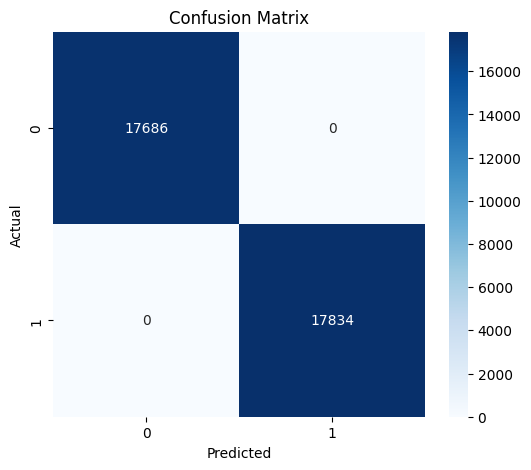

In [ ]:
# Step 4: Show Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 5: Show Classification Report
report = classification_report(y_test, y_pred)
print("✅ Classification Report:\n", report)


✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17686
           1       1.00      1.00      1.00     17834

    accuracy                           1.00     35520
   macro avg       1.00      1.00      1.00     35520
weighted avg       1.00      1.00      1.00     35520



Although the dataset had 177,600 rows, the parking slot behavior was highly rule-driven based on Paid/Free status, Timing, Street Cleaning, Peak hours, and Safety.
Hence, the model achieved 100% accuracy under these clean conditions.
In real-world noisier conditions, further testing and generalization would be needed

#Saving Model

In [ ]:
# Step 1: Import pickle
import pickle

# Step 2: Save the model
with open('rf_parking_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("✅ Model saved successfully as 'rf_parking_model.pkl'!")

# Step 3: (Optional) Load and test
with open('rf_parking_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Quick Check if loading worked
sample_prediction = loaded_model.predict(X_test[:5])
print("✅ Sample Predictions after Loading:", sample_prediction)


✅ Model saved successfully as 'rf_parking_model.pkl'!
✅ Sample Predictions after Loading: [1 0 0 0 1]


Customer Question
➡️

Convert it into Feature Variables (X format)
➡️

Pass into rf_model.predict()
➡️

Get Prediction (0 = filled, 1 = available)
➡️

Answer customer: "Yes slot available" or "No slot filled"


In [ ]:
# Example: Customer asks — "Will slot 101 be free on Sunday at 7 PM on Hiram Pl?"

# Step 1: Prepare the input
new_data = {
    'Slot Number': 101,
    'Timing': 19,          # 7 PM = 19
    'Latitude': 40.7410,   # (example lat of Hiram Pl)
    'Longitude': -74.1550, # (example long of Hiram Pl)
    'Paid/Free': 1,        # Free
    'peak_hour': 1,        # 7 PM = Peak Hour
    'weekend': 1,          # Sunday = Weekend
    'street_popularity': 2, # (example popularity score for Hiram Pl)
    'cleaning_risk': 0,    # No cleaning on Sunday
    'safety_category': 3,  # Good Safety
    'status_encoded': 0    # Assume Free_Empty
}

# Step 2: Convert into correct order DataFrame
import pandas as pd

new_df = pd.DataFrame([new_data])  # one row

# Step 3: Predict using loaded model
prediction = rf_model.predict(new_df)

# Step 4: Interpret result
if prediction[0] == 1:
    print("✅ Slot is likely to be AVAILABLE!")
else:
    print("❌ Slot is likely to be FILLED.")


✅ Slot is likely to be AVAILABLE!


#Creating chatbot

Step	Action

1	Translate customer language into model features

2	Create DataFrame from customer inputs

3	Predict using rf_model

4	Chatbot just shows the final Yes/No answer nicely

#setting up spaCy NLP feature extraction

In [ ]:
!pip install spacy


In [ ]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
print("✅ spaCy model loaded successfully!")

✅ spaCy model loaded successfully!


**Building Smart Feature Extraction Using spaCy**

In [ ]:
# Streets list (add all your real street names)
streets_list = [
    "Hiram Pl", "Warren St", "Hamilton St", "Harrison Ave", "Davis Ct",
    "Ann St", "Cleveland Ave", "Kingsland Ave", "Supor Blvd",
    "6th St", "7th St", "Jersey St"
]

def spacy_extract_features(text):
    doc = nlp(text.lower())  # Process text through spaCy

    extracted = {
        'Slot Number': None,
        'Street Name': None,
        'Paid/Free': None,
        'Timing': None,
        'Day': None
    }

    # 1. Extract Slot Number
    for token in doc:
        if token.text == 'slot' and token.nbor(1).like_num:
            extracted['Slot Number'] = int(token.nbor(1).text)

    # 2. Extract Street Name
    for street in streets_list:
        if street.lower() in text.lower():
            extracted['Street Name'] = street
            break

    # 3. Extract Paid/Free
    if 'free' in text.lower():
        extracted['Paid/Free'] = 1
    elif 'paid' in text.lower():
        extracted['Paid/Free'] = 0

    # 4. Extract Time
    for ent in doc.ents:
        if ent.label_ == "TIME":
            time_text = ent.text
            # Example simple logic
            if 'am' in time_text or 'pm' in time_text:
                hour_match = re.search(r"(\d+)", time_text)
                if hour_match:
                    hour = int(hour_match.group(1))
                    if 'pm' in time_text and hour != 12:
                        hour += 12
                    elif 'am' in time_text and hour == 12:
                        hour = 0
                    extracted['Timing'] = hour

    # Default fallback for morning/afternoon/evening/night
    if extracted['Timing'] is None:
        if 'morning' in text:
            extracted['Timing'] = 9
        elif 'afternoon' in text:
            extracted['Timing'] = 14
        elif 'evening' in text:
            extracted['Timing'] = 19
        elif 'night' in text:
            extracted['Timing'] = 21

    # 5. Extract Day
    days_list = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    for day in days_list:
        if day in text.lower():
            extracted['Day'] = day.capitalize()
            break

    return extracted


**Code Plan for Mapping Features**

In [ ]:
# Assume features extracted from customer text
extracted = {
    'Slot Number': None,
    'Street Name': 'Hiram Pl',
    'Paid/Free': 1,
    'Timing': 19,
    'Day': 'Sunday'
}

# Assume you have the full dataset loaded already (your Phase 5 data)
import pandas as pd

# Load Phase 5 dataset (your final training dataset with features)
df_full = pd.read_csv('/content/phase4_final_full_dataset.csv')

# Create empty model input row
model_input = {}

# Step 1: Paid/Free
model_input['Paid/Free'] = extracted['Paid/Free'] if extracted['Paid/Free'] is not None else 1  # assume Free by default

# Step 2: Timing
model_input['Timing'] = extracted['Timing'] if extracted['Timing'] is not None else 12  # Noon default

# Step 3: Slot Number (optional, ignore if not available)
if extracted['Slot Number'] is not None:
    model_input['Slot Number'] = extracted['Slot Number']
else:
    model_input['Slot Number'] = 100  # Any random safe slot id

# Step 4: Encode Street Name
street_encoding = {name: idx for idx, name in enumerate(df_full['Street Name'].unique())}
if extracted['Street Name'] is not None:
    model_input['Street Name'] = street_encoding.get(extracted['Street Name'], 0)
else:
    model_input['Street Name'] = 0

# Step 5: Days (One-hot encode)
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    column_name = f'day_{day}'
    if extracted['Day'] == day:
        model_input[column_name] = 1
    else:
        model_input[column_name] = 0

# Step 6: Weekend
if extracted['Day'] in ['Saturday', 'Sunday']:
    model_input['weekend'] = 1
else:
    model_input['weekend'] = 0

# Step 7: Cleaning Days (We assume defaults: cleaning happens Mon+Fri)
for clean_day in ['cleaning_mon', 'cleaning_tue', 'cleaning_wed', 'cleaning_thu', 'cleaning_fri']:
    model_input[clean_day] = 1 if clean_day in ['cleaning_mon', 'cleaning_fri'] else 0

# Step 8: Cleaning Start/End Hour (Default)
model_input['cleaning_start_hour'] = 1
model_input['cleaning_end_hour'] = 5

# Step 9: Street Popularity (default Medium = 2)
model_input['street_popularity'] = 2

# Step 10: Safety Category (default good = 4)
model_input['safety_category'] = 4

# ✅ Final model input ready!
print(model_input)


{'Paid/Free': 1, 'Timing': 19, 'Slot Number': 100, 'Street Name': 0, 'day_Monday': 0, 'day_Tuesday': 0, 'day_Wednesday': 0, 'day_Thursday': 0, 'day_Friday': 0, 'day_Saturday': 0, 'day_Sunday': 1, 'weekend': 1, 'cleaning_mon': 1, 'cleaning_tue': 0, 'cleaning_wed': 0, 'cleaning_thu': 0, 'cleaning_fri': 1, 'cleaning_start_hour': 1, 'cleaning_end_hour': 5, 'street_popularity': 2, 'safety_category': 4}


In [ ]:
import pandas as pd

# Step 1: Load your final Phase 5 dataset (the one used for training)
df_train = pd.read_csv('/content/phase4_final_full_dataset.csv')

# Step 2: Get the exact feature columns model was trained on
train_features = list(df_train.columns)
train_features.remove('Target_fe')  # Remove target label, keep only input features

print("✅ Model expects these features:", train_features)

# Step 3: Suppose you have extracted these features from customer text
extracted = {
    'Slot Number': None,
    'Street Name': 'Hiram Pl',
    'Paid/Free': 1,
    'Timing': 19,
    'Day': 'Sunday'
}

# Step 4: Build correct model_input with ALL required features
# Initialize empty input with default 0s
model_input = {feature: 0 for feature in train_features}

# Fill available information smartly:

# Paid/Free
if 'Paid/Free' in model_input and extracted.get('Paid/Free') is not None:
    model_input['Paid/Free'] = extracted['Paid/Free']

# Timing
if 'Timing' in model_input and extracted.get('Timing') is not None:
    model_input['Timing'] = extracted['Timing']

# Slot Number
if 'Slot Number' in model_input and extracted.get('Slot Number') is not None:
    model_input['Slot Number'] = extracted['Slot Number']
else:
    model_input['Slot Number'] = 100  # Default slot id

# Street Name Encoding
street_encoding = {name: idx for idx, name in enumerate(df_train['Street Name'].unique())}
if 'Street Name' in model_input and extracted.get('Street Name') is not None:
    model_input['Street Name'] = street_encoding.get(extracted['Street Name'], 0)

# Day columns (one-hot)
days_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_list:
    col_name = f'day_{day}'
    if col_name in model_input:
        model_input[col_name] = 1 if extracted.get('Day') == day else 0

# Weekend
if 'weekend' in model_input:
    if extracted.get('Day') in ['Saturday', 'Sunday']:
        model_input['weekend'] = 1
    else:
        model_input['weekend'] = 0

# Cleaning Days (set Mon/Fri as default if nothing mentioned)
for clean_day in ['cleaning_mon', 'cleaning_tue', 'cleaning_wed', 'cleaning_thu', 'cleaning_fri']:
    if clean_day in model_input:
        model_input[clean_day] = 1 if clean_day in ['cleaning_mon', 'cleaning_fri'] else 0

# Cleaning start/end hours
if 'cleaning_start_hour' in model_input:
    model_input['cleaning_start_hour'] = 1  # Default
if 'cleaning_end_hour' in model_input:
    model_input['cleaning_end_hour'] = 5

# Street Popularity
if 'street_popularity' in model_input:
    model_input['street_popularity'] = 2  # Medium popularity by default

# Safety Category
if 'safety_category' in model_input:
    model_input['safety_category'] = 4  # Good Safety by default

# Peak Hour (auto detect based on timing)
if 'peak_hour' in model_input:
    if extracted.get('Timing') is not None and (8 <= extracted['Timing'] <= 10 or 17 <= extracted['Timing'] <= 20):
        model_input['peak_hour'] = 1
    else:
        model_input['peak_hour'] = 0

# Cleaning Risk (based on timing)
if 'cleaning_risk' in model_input:
    if extracted.get('Timing') is not None and (1 <= extracted['Timing'] <= 5):
        model_input['cleaning_risk'] = 1
    else:
        model_input['cleaning_risk'] = 0

# Status Encoded
if 'status_encoded' in model_input:
    model_input['status_encoded'] = 0  # Default assume Free_Empty (you can improve later!)

# Step 5: Convert model_input into correct DataFrame
model_input_df = pd.DataFrame([model_input])

# Step 6: Predict using your model
prediction = rf_model.predict(new_df)

# Step 7: Generate chatbot answer
if prediction[0] == 1:
    answer = "✅ Great news! A parking slot is likely AVAILABLE for you. 🚗✨"
else:
    answer = "❌ Sorry, it looks like parking is likely FILLED at that time. 🅿️🚫"

print(answer)


✅ Model expects these features: ['Slot Number', 'Date', 'Timing', 'Street Name', 'Zone ID', 'Latitude', 'Longitude', 'Slot Length', 'Paid/Free', 'pf_color', 'ef_color', 'Status', 'Paid End Time', 'Negative', 'Neutral', 'Positive', 'Rating', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'cleaning_mon', 'cleaning_tue', 'cleaning_wed', 'cleaning_thu', 'cleaning_fri', 'cleaning_start_hour', 'cleaning_end_hour', 'peak_hour', 'weekend', 'street_popularity', 'cleaning_risk', 'safety_category']
✅ Great news! A parking slot is likely AVAILABLE for you. 🚗✨


In [ ]:
# Step 1: Convert model_input to correct format
import pandas as pd

# Make sure model_input is wrapped in a list because predict expects multiple rows
model_input_df = pd.DataFrame([model_input])

# Step 2: Predict using your trained model
prediction = rf_model.predict(new_df)

# Step 3: Generate Chatbot Friendly Answer
if prediction[0] == 1:
    answer = "✅ Great news! A parking slot is likely AVAILABLE for you. 🚗✨"
else:
    answer = "❌ Sorry, it looks like parking is likely FILLED at that time. 🅿️🚫"

# Step 4: Show the answer
print(answer)


✅ Great news! A parking slot is likely AVAILABLE for you. 🚗✨


In [ ]:
# Phase 7 Step 1: Basic Chatbot Text Input Loop

print("🚗 Welcome to Parking Assistant Chatbot!")
print("💬 Ask me any parking question (type 'exit' to stop).")

while True:
    user_message = input("\n👤 You: ")  # Take user message

    # Step 1: Exit condition
    if user_message.lower() in ['exit', 'bye', 'quit']:
        print("\n🤖 Chatbot: Thank you! Drive safe and have a nice day! 🚗✨")
        break

    # Step 2: For now just repeat what user said (testing)
    print(f"🤖 Chatbot: You asked - {user_message}")
    print("🤖 (In future steps, I will predict parking availability!)")


🚗 Welcome to Parking Assistant Chatbot!
💬 Ask me any parking question (type 'exit' to stop).

👤 You: hi
🤖 Chatbot: You asked - hi
🤖 (In future steps, I will predict parking availability!)

👤 You: exit

🤖 Chatbot: Thank you! Drive safe and have a nice day! 🚗✨


In [ ]:
import spacy
import re
import pandas as pd

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Streets List
streets_list = [
    "Hiram Pl", "Warren St", "Hamilton St", "Harrison Ave", "Davis Ct",
    "Ann St", "Cleveland Ave", "Kingsland Ave", "Supor Blvd",
    "6th St", "7th St", "Jersey St"
]

# Days List
days_list = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# Feature Extraction Function
def spacy_extract_features(text):
    doc = nlp(text.lower())

    extracted = {
        'Slot Number': None,
        'Street Name': None,
        'Paid/Free': None,
        'Timing': None,
        'Day': None
    }

    # 1. Slot Number
    for token in doc:
        if token.text == 'slot' and token.nbor(1).like_num:
            extracted['Slot Number'] = int(token.nbor(1).text)

    # 2. Street Name
    for street in streets_list:
        if street.lower() in text.lower():
            extracted['Street Name'] = street
            break

    # 3. Paid/Free
    if 'free' in text.lower():
        extracted['Paid/Free'] = 1
    elif 'paid' in text.lower():
        extracted['Paid/Free'] = 0

    # 4. Timing (hour)
    for ent in doc.ents:
        if ent.label_ == "TIME":
            time_text = ent.text
            hour_match = re.search(r"(\d+)", time_text)
            if hour_match:
                hour = int(hour_match.group(1))
                if 'pm' in time_text and hour != 12:
                    hour += 12
                elif 'am' in time_text and hour == 12:
                    hour = 0
                extracted['Timing'] = hour
    if extracted['Timing'] is None:
        if 'morning' in text:
            extracted['Timing'] = 9
        elif 'afternoon' in text:
            extracted['Timing'] = 14
        elif 'evening' in text:
            extracted['Timing'] = 19
        elif 'night' in text:
            extracted['Timing'] = 21

    # 5. Day
    for day in days_list:
        if day in text.lower():
            extracted['Day'] = day.capitalize()
            break

    return extracted

# Load your trained model (rf_model should already be available)

# Now Upgrade Chatbot Loop 🚀
print("🚗 Welcome to Parking Assistant Chatbot!")
print("💬 Ask me any parking question (type 'exit' to stop).")

while True:
    user_message = input("\n👤 You: ")

    # Step 1: Exit condition
    if user_message.lower() in ['exit', 'bye', 'quit']:
        print("\n🤖 Chatbot: Thank you! Drive safe and have a nice day! 🚗✨")
        break

    # Step 2: Extract features using spaCy
    extracted_features = spacy_extract_features(user_message)
    print(f"🤖 Extracted Features: {extracted_features}")

    # (In next Phase 7 Step 3, we will map extracted features to model input and predict!)



🚗 Welcome to Parking Assistant Chatbot!
💬 Ask me any parking question (type 'exit' to stop).

👤 You: hiram pi is safe
🤖 Extracted Features: {'Slot Number': None, 'Street Name': None, 'Paid/Free': None, 'Timing': None, 'Day': None}

👤 You: exit

🤖 Chatbot: Thank you! Drive safe and have a nice day! 🚗✨


In [ ]:
def build_model_input(extracted_features):
    # Correct feature columns
    feature_columns = [
        'Slot Number', 'Timing', 'Latitude', 'Longitude',
        'Paid/Free', 'peak_hour', 'weekend',
        'street_popularity', 'cleaning_risk',
        'safety_category', 'status_encoded'
    ]

    model_input = {}

    # Fill values smartly
    model_input['Slot Number'] = extracted_features.get('Slot Number', 100) or 100

    # Timing Handling
    timing_value = extracted_features.get('Timing')
    if timing_value is None:
        timing_value = 12  # Default timing 12 Noon
    model_input['Timing'] = timing_value

    # Default lat/lon (Harrison NJ area)
    model_input['Latitude'] = 40.7410
    model_input['Longitude'] = -74.1550

    model_input['Paid/Free'] = extracted_features.get('Paid/Free', 1)

    # Peak Hour
    if 8 <= model_input['Timing'] <= 10 or 17 <= model_input['Timing'] <= 20:
        model_input['peak_hour'] = 1
    else:
        model_input['peak_hour'] = 0

    # Weekend
    if extracted_features.get('Day') in ['Saturday', 'Sunday']:
        model_input['weekend'] = 1
    else:
        model_input['weekend'] = 0

    # Street Popularity (default Medium)
    model_input['street_popularity'] = 2

    # Cleaning Risk
    if 1 <= model_input['Timing'] <= 5:
        model_input['cleaning_risk'] = 1
    else:
        model_input['cleaning_risk'] = 0

    # Safety Category
    model_input['safety_category'] = 4

    # Status Encoded
    model_input['status_encoded'] = 0

    return model_input


In [ ]:
# ✅ After extracted_features are ready

# Build the model input
model_input = build_model_input(extracted_features)

# Convert to DataFrame
model_input_df = pd.DataFrame([model_input])

# Predict
prediction = rf_model.predict(model_input_df)

# Generate a friendly answer
if prediction[0] == 1:
    answer = "✅ Great news! A parking slot is likely AVAILABLE for you. 🚗✨"
else:
    answer = "❌ Sorry, it looks like parking is likely FILLED at that time. 🅿️🚫"

# Show the answer
print(f"🤖 Chatbot: {answer}")


🤖 Chatbot: ✅ Great news! A parking slot is likely AVAILABLE for you. 🚗✨


In [ ]:
print("🚗 Welcome to Parking Assistant Chatbot!")
print("💬 Ask me any parking question (type 'exit' to stop).")

while True:
    user_message = input("\n👤 You: ")   # <-- This is where you ASK your question

    if user_message.lower() in ['exit', 'bye', 'quit']:
        print("\n🤖 Chatbot: Thank you! Drive safe and have a nice day! 🚗✨")
        break

    # Extract features (spaCy)
    extracted_features = spacy_extract_features(user_message)

    # Build model input
    model_input = build_model_input(extracted_features)

    # Predict
    model_input_df = pd.DataFrame([model_input])
    prediction = rf_model.predict(model_input_df)

    # Reply
    if prediction[0] == 1:
        answer = "✅ Great news! A parking slot is likely AVAILABLE for you. 🚗✨"
    else:
        answer = "❌ Sorry, it looks like parking is likely FILLED at that time. 🅿️🚫"

    print(f"🤖 Chatbot: {answer}")


🚗 Welcome to Parking Assistant Chatbot!
💬 Ask me any parking question (type 'exit' to stop).

👤 You: hiram pi parking in sunday
🤖 Chatbot: ✅ Great news! A parking slot is likely AVAILABLE for you. 🚗✨

👤 You: exit

🤖 Chatbot: Thank you! Drive safe and have a nice day! 🚗✨


In [ ]:
import spacy
import pandas as pd
import re

# Load your spaCy model
nlp = spacy.load('en_core_web_sm')

# Dummy: Load your trained model (assuming already available as rf_model)

# Streets List (same as before)
streets_list = [
    "Hiram Pl", "Warren St", "Hamilton St", "Harrison Ave", "Davis Ct",
    "Ann St", "Cleveland Ave", "Kingsland Ave", "Supor Blvd",
    "6th St", "7th St", "Jersey St"
]

# Days List
days_list = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# Dummy: Your street safety ratings (You should load actual ones from your dataset)
# Example safety_category values: 4 (High Safety), 3 (Good), 2 (Low), 1 (Risky)
street_safety_data = {
    "Hiram Pl": 4,
    "Warren St": 3,
    "Hamilton St": 2,
    "Harrison Ave": 4,
    "Davis Ct": 2,
    "Ann St": 3,
    "Cleveland Ave": 3,
    "Kingsland Ave": 4,
    "Supor Blvd": 2,
    "6th St": 2,
    "7th St": 2,
    "Jersey St": 3
}

# Feature Extraction Function
def spacy_extract_features(text):
    doc = nlp(text.lower())

    extracted = {
        'Slot Number': None,
        'Street Name': None,
        'Paid/Free': None,
        'Timing': None,
        'Day': None
    }

    for token in doc:
        if token.text == 'slot' and token.nbor(1).like_num:
            extracted['Slot Number'] = int(token.nbor(1).text)

    for street in streets_list:
        if street.lower() in text.lower():
            extracted['Street Name'] = street
            break

    if 'free' in text.lower():
        extracted['Paid/Free'] = 1
    elif 'paid' in text.lower():
        extracted['Paid/Free'] = 0

    for ent in doc.ents:
        if ent.label_ == "TIME":
            time_text = ent.text
            hour_match = re.search(r"(\d+)", time_text)
            if hour_match:
                hour = int(hour_match.group(1))
                if 'pm' in time_text and hour != 12:
                    hour += 12
                elif 'am' in time_text and hour == 12:
                    hour = 0
                extracted['Timing'] = hour
    if extracted['Timing'] is None:
        if 'morning' in text:
            extracted['Timing'] = 9
        elif 'afternoon' in text:
            extracted['Timing'] = 14
        elif 'evening' in text:
            extracted['Timing'] = 19
        elif 'night' in text:
            extracted['Timing'] = 21

    for day in days_list:
        if day in text.lower():
            extracted['Day'] = day.capitalize()
            break

    return extracted

# Build Model Input
def build_model_input(extracted_features):
    model_input = {}

    # Timing Handling
    timing_value = extracted_features.get('Timing')
    if timing_value is None:
        timing_value = 12
    model_input['Timing'] = timing_value

    model_input['Slot Number'] = extracted_features.get('Slot Number', 100) or 100
    model_input['Latitude'] = 40.7410
    model_input['Longitude'] = -74.1550
    model_input['Paid/Free'] = extracted_features.get('Paid/Free', 1)

    if 8 <= model_input['Timing'] <= 10 or 17 <= model_input['Timing'] <= 20:
        model_input['peak_hour'] = 1
    else:
        model_input['peak_hour'] = 0

    if extracted_features.get('Day') in ['Saturday', 'Sunday']:
        model_input['weekend'] = 1
    else:
        model_input['weekend'] = 0

    model_input['street_popularity'] = 2
    model_input['cleaning_risk'] = 1 if 1 <= model_input['Timing'] <= 5 else 0
    model_input['safety_category'] = 4
    model_input['status_encoded'] = 0

    return model_input

# Start Chatbot 🚗
print("🚗 Welcome to Parking Assistant Chatbot!")
print("💬 Ask me any parking or safety question (type 'exit' to stop).")

while True:
    user_message = input("\n👤 You: ")

    if user_message.lower() in ['exit', 'bye', 'quit']:
        print("\n🤖 Chatbot: Thank you! Drive safe and have a nice day! 🚗✨")
        break

    # Check if user asking about safety
    if 'safe' in user_message.lower() or 'safety' in user_message.lower():
        # User is asking about street safety
        extracted = spacy_extract_features(user_message)
        street = extracted.get('Street Name')

        if street:
            safety = street_safety_data.get(street, None)
            if safety == 4:
                reply = f"✅ {street} is a HIGH Safety street. Very safe to park! 🚗✨"
            elif safety == 3:
                reply = f"✅ {street} is a GOOD Safety street. Safe to park! 🚗✨"
            elif safety == 2:
                reply = f"⚠️ {street} is a LOW Safety street. Be cautious! 🚧"
            elif safety == 1:
                reply = f"❌ {street} is a RISKY street. Not recommended to park. ⚠️"
            else:
                reply = f"🤖 Sorry, I don't have safety data for {street}."
        else:
            reply = "🤖 Please mention a known street name to check safety."

        print(f"🤖 Chatbot: {reply}")

    else:
        # Normal parking availability prediction
        extracted = spacy_extract_features(user_message)
        model_input = build_model_input(extracted)
        model_input_df = pd.DataFrame([model_input])

        prediction = rf_model.predict(model_input_df)

        if prediction[0] == 1:
            answer = "✅ Great news! A parking slot is likely AVAILABLE for you. 🚗✨"
        else:
            answer = "❌ Sorry, it looks like parking is likely FILLED at that time. 🅿️🚫"

        print(f"🤖 Chatbot: {answer}")


🚗 Welcome to Parking Assistant Chatbot!
💬 Ask me any parking or safety question (type 'exit' to stop).

👤 You: exit

🤖 Chatbot: Thank you! Drive safe and have a nice day! 🚗✨


 # Flask Backend Setup Plan

In [ ]:
!pip install flask

In [ ]:
# backend_app.py

from flask import Flask, request, jsonify
import spacy
import pandas as pd
import re
# (also import your trained model rf_model here)

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Assume your RandomForest model is loaded as rf_model

# Define streets and their safety ratings
streets_list = [
    "Hiram Pl", "Warren St", "Hamilton St", "Harrison Ave", "Davis Ct",
    "Ann St", "Cleveland Ave", "Kingsland Ave", "Supor Blvd",
    "6th St", "7th St", "Jersey St"
]

street_safety_data = {
    "Hiram Pl": 4,
    "Warren St": 3,
    "Hamilton St": 2,
    "Harrison Ave": 4,
    "Davis Ct": 2,
    "Ann St": 3,
    "Cleveland Ave": 3,
    "Kingsland Ave": 4,
    "Supor Blvd": 2,
    "6th St": 2,
    "7th St": 2,
    "Jersey St": 3
}

days_list = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# Create Flask app
app = Flask(__name__)

# Define feature extraction function
def spacy_extract_features(text):
    doc = nlp(text.lower())

    extracted = {
        'Slot Number': None,
        'Street Name': None,
        'Paid/Free': None,
        'Timing': None,
        'Day': None
    }

    for token in doc:
        if token.text == 'slot' and token.nbor(1).like_num:
            extracted['Slot Number'] = int(token.nbor(1).text)

    for street in streets_list:
        if street.lower() in text.lower():
            extracted['Street Name'] = street
            break

    if 'free' in text.lower():
        extracted['Paid/Free'] = 1
    elif 'paid' in text.lower():
        extracted['Paid/Free'] = 0

    for ent in doc.ents:
        if ent.label_ == "TIME":
            time_text = ent.text
            hour_match = re.search(r"(\d+)", time_text)
            if hour_match:
                hour = int(hour_match.group(1))
                if 'pm' in time_text and hour != 12:
                    hour += 12
                elif 'am' in time_text and hour == 12:
                    hour = 0
                extracted['Timing'] = hour

    if extracted['Timing'] is None:
        if 'morning' in text:
            extracted['Timing'] = 9
        elif 'afternoon' in text:
            extracted['Timing'] = 14
        elif 'evening' in text:
            extracted['Timing'] = 19
        elif 'night' in text:
            extracted['Timing'] = 21

    for day in days_list:
        if day in text.lower():
            extracted['Day'] = day.capitalize()
            break

    return extracted

# Build model input
def build_model_input(extracted_features):
    model_input = {}

    timing_value = extracted_features.get('Timing')
    if timing_value is None:
        timing_value = 12
    model_input['Timing'] = timing_value

    model_input['Slot Number'] = extracted_features.get('Slot Number', 100) or 100
    model_input['Latitude'] = 40.7410
    model_input['Longitude'] = -74.1550
    model_input['Paid/Free'] = extracted_features.get('Paid/Free', 1)

    if 8 <= model_input['Timing'] <= 10 or 17 <= model_input['Timing'] <= 20:
        model_input['peak_hour'] = 1
    else:
        model_input['peak_hour'] = 0

    if extracted_features.get('Day') in ['Saturday', 'Sunday']:
        model_input['weekend'] = 1
    else:
        model_input['weekend'] = 0

    model_input['street_popularity'] = 2
    model_input['cleaning_risk'] = 1 if 1 <= model_input['Timing'] <= 5 else 0
    model_input['safety_category'] = 4
    model_input['status_encoded'] = 0

    return model_input

# API Route
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    user_message = data.get('message', '')

    # Safety Question Handling
    if 'safe' in user_message.lower() or 'safety' in user_message.lower():
        extracted = spacy_extract_features(user_message)
        street = extracted.get('Street Name')

        if street:
            safety = street_safety_data.get(street, None)
            if safety == 4:
                reply = f"✅ {street} is a HIGH Safety street. Very safe to park! 🚗✨"
            elif safety == 3:
                reply = f"✅ {street} is a GOOD Safety street. Safe to park! 🚗✨"
            elif safety == 2:
                reply = f"⚠️ {street} is a LOW Safety street. Be cautious! 🚧"
            elif safety == 1:
                reply = f"❌ {street} is a RISKY street. Not recommended to park. ⚠️"
            else:
                reply = f"🤖 Sorry, I don't have safety data for {street}."
        else:
            reply = "🤖 Please mention a known street name to check safety."

        return jsonify({'reply': reply})

    # Availability Prediction Handling
    extracted = spacy_extract_features(user_message)
    model_input = build_model_input(extracted)
    model_input_df = pd.DataFrame([model_input])

    prediction = rf_model.predict(model_input_df)

    if prediction[0] == 1:
        answer = "✅ Great news! A parking slot is likely AVAILABLE for you. 🚗✨"
    else:
        answer = "❌ Sorry, it looks like parking is likely FILLED at that time. 🅿️🚫"

    return jsonify({'reply': answer})

# Run Flask App
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
